In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with np.load('./notMNIST.npz') as data :
    Data, Target = data ["images"], data["labels"]
    np.random.seed(521)
    randIndx = np.arange(len(Data))
    np.random.shuffle(randIndx)
    Data = Data[randIndx]/255.
    Target = Target[randIndx]
    trainData, trainTarget = Data[:15000], Target[:15000]
    validData, validTarget = Data[15000:16000], Target[15000:16000]
    testData, testTarget = Data[16000:], Target[16000:]

In [3]:
trainZeros=np.zeros((15000, 10))
trainZeros[np.arange(15000),trainTarget]=1
trainTarget = trainZeros
validZeros=np.zeros((1000, 10))
validZeros[np.arange(1000),validTarget]=1
validTarget = validZeros
testZeros=np.zeros((2724, 10))
testZeros[np.arange(2724),testTarget]=1
testTarget = testZeros

In [4]:
n_epochs = 500
batch_size = 500
n_dim = 28*28

In [5]:
def grab_batches(trainData, trainTarget, batch_size):
    batch_indices = np.random.permutation(range(15000)).reshape(-1, batch_size)
    X_batches = trainData.reshape(-1, n_dim)[batch_indices]
    y_batches = trainTarget[batch_indices]
    batches = zip(X_batches, y_batches)
    return batches

In [6]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,10])
lr = tf.placeholder(tf.float32)
weight_decay = 3e-4

In [7]:
def hidden_layer(X, hidden_units):
    x_dimension = X.shape[1].value
    initializer = tf.contrib.layers.xavier_initializer(uniform=False)
    hidden_weights = tf.Variable(initializer([x_dimension, hidden_units]), name='weights')
    hidden_biases = tf.Variable(tf.zeros(hidden_units), name='biases')
    
    return tf.add(tf.matmul(X, hidden_weights), hidden_biases), hidden_weights

In [8]:
y_, W1 = hidden_layer(X,1000)
y_, W2 = hidden_layer(tf.nn.relu(y_),10)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=y_))
regularizer = (tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2)) 
loss = tf.reduce_mean(loss + weight_decay * regularizer)

prediction = tf.cast(tf.round(tf.argmax(y_,1)), tf.int8)
equality = tf.equal(prediction, tf.cast(tf.argmax(Y,1), tf.int8))
accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))

training_step = tf.train.AdamOptimizer(lr).minimize(loss)
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [9]:
learning_rates = 10**np.random.uniform(low=-6, high=0, size=10)

In [10]:
def plot_metrics(learning_rate):
    for metric in ['loss', 'accuracy']:
        plt.figure(figsize=(12,9))
        plt.title('{} vs. num. of epochs for learning rate of {:.5}'.format(metric, learning_rate))
        for dataset in ['train', 'test', 'valid']:
            plt.plot(range(1, epoch+1), metrics[dataset][metric], label=dataset)
        plt.axvline(x=best_epoch[metric], linewidth=1, linestyle='dashed', color='k', label='early stopping')
        plt.legend()
        plt.savefig('figures/lr_{:.5}_{}.png'.format(learning_rate, metric), dpi=300, bbox_inches='tight')

Learning Rate: 0.004509671577167175 

Epoch: 10, Train Loss: 0.2215, Train Accuracy: 0.9686
Best Epoch: {'loss': 10, 'accuracy': 10}, Best Valid Loss: 0.3429, Best Valid Accuracy: 0.932 

Epoch: 20, Train Loss: 0.1516, Train Accuracy: 0.9891
Best Epoch: {'loss': 10, 'accuracy': 17}, Best Valid Loss: 0.3429, Best Valid Accuracy: 0.935 

Epoch: 30, Train Loss: 0.1533, Train Accuracy: 0.9853
Best Epoch: {'loss': 10, 'accuracy': 21}, Best Valid Loss: 0.3429, Best Valid Accuracy: 0.937 

Epoch: 40, Train Loss: 0.1472, Train Accuracy: 0.9871
Best Epoch: {'loss': 10, 'accuracy': 21}, Best Valid Loss: 0.3429, Best Valid Accuracy: 0.937 

Epoch: 50, Train Loss: 0.1147, Train Accuracy: 0.9935
Best Epoch: {'loss': 10, 'accuracy': 49}, Best Valid Loss: 0.3429, Best Valid Accuracy: 0.94 

Epoch: 60, Train Loss: 0.1289, Train Accuracy: 0.9899
Best Epoch: {'loss': 10, 'accuracy': 49}, Best Valid Loss: 0.3429, Best Valid Accuracy: 0.94 

Epoch: 70, Train Loss: 0.1175, Train Accuracy: 0.9924
Best Epoch

Epoch: 40, Train Loss: 0.2187, Train Accuracy: 0.9653
Best Epoch: {'loss': 34, 'accuracy': 30}, Best Valid Loss: 0.3953, Best Valid Accuracy: 0.93 

Epoch: 50, Train Loss: 0.2129, Train Accuracy: 0.9659
Best Epoch: {'loss': 34, 'accuracy': 30}, Best Valid Loss: 0.3953, Best Valid Accuracy: 0.93 

Epoch: 60, Train Loss: 0.2199, Train Accuracy: 0.9671
Best Epoch: {'loss': 34, 'accuracy': 30}, Best Valid Loss: 0.3953, Best Valid Accuracy: 0.93 

Epoch: 70, Train Loss: 0.1656, Train Accuracy: 0.9797
Best Epoch: {'loss': 34, 'accuracy': 30}, Best Valid Loss: 0.3953, Best Valid Accuracy: 0.93 

Epoch: 80, Train Loss: 0.2054, Train Accuracy: 0.9655
Best Epoch: {'loss': 34, 'accuracy': 30}, Best Valid Loss: 0.3953, Best Valid Accuracy: 0.93 

Epoch: 90, Train Loss: 0.1863, Train Accuracy: 0.9731
Best Epoch: {'loss': 34, 'accuracy': 30}, Best Valid Loss: 0.3953, Best Valid Accuracy: 0.93 

Epoch: 100, Train Loss: 0.2185, Train Accuracy: 0.9658
Best Epoch: {'loss': 34, 'accuracy': 30}, Best Vali

Epoch: 90, Train Loss: 0.4051, Train Accuracy: 0.9094
Best Epoch: {'loss': 37, 'accuracy': 11}, Best Valid Loss: 0.4307, Best Valid Accuracy: 0.917 

Epoch: 100, Train Loss: 0.3784, Train Accuracy: 0.9143
Best Epoch: {'loss': 37, 'accuracy': 11}, Best Valid Loss: 0.4307, Best Valid Accuracy: 0.917 

Epoch: 110, Train Loss: 0.3492, Train Accuracy: 0.9217
Best Epoch: {'loss': 37, 'accuracy': 11}, Best Valid Loss: 0.4307, Best Valid Accuracy: 0.917 

Epoch: 120, Train Loss: 0.3902, Train Accuracy: 0.9081
Best Epoch: {'loss': 111, 'accuracy': 11}, Best Valid Loss: 0.4087, Best Valid Accuracy: 0.917 

Epoch: 130, Train Loss: 0.3543, Train Accuracy: 0.9191
Best Epoch: {'loss': 111, 'accuracy': 11}, Best Valid Loss: 0.4087, Best Valid Accuracy: 0.917 

Epoch: 140, Train Loss: 0.3928, Train Accuracy: 0.917
Best Epoch: {'loss': 111, 'accuracy': 11}, Best Valid Loss: 0.4087, Best Valid Accuracy: 0.917 

Epoch: 150, Train Loss: 0.4554, Train Accuracy: 0.8895
Best Epoch: {'loss': 111, 'accuracy': 

Epoch: 130, Train Loss: 0.5192, Train Accuracy: 0.8997
Best Epoch: {'loss': 130, 'accuracy': 127}, Best Valid Loss: 0.5163, Best Valid Accuracy: 0.897 

Epoch: 140, Train Loss: 0.5099, Train Accuracy: 0.9017
Best Epoch: {'loss': 140, 'accuracy': 137}, Best Valid Loss: 0.5079, Best Valid Accuracy: 0.899 

Epoch: 150, Train Loss: 0.5014, Train Accuracy: 0.9039
Best Epoch: {'loss': 150, 'accuracy': 144}, Best Valid Loss: 0.5008, Best Valid Accuracy: 0.9 

Epoch: 160, Train Loss: 0.4937, Train Accuracy: 0.9054
Best Epoch: {'loss': 160, 'accuracy': 160}, Best Valid Loss: 0.4939, Best Valid Accuracy: 0.901 

Epoch: 170, Train Loss: 0.4866, Train Accuracy: 0.9073
Best Epoch: {'loss': 170, 'accuracy': 170}, Best Valid Loss: 0.4878, Best Valid Accuracy: 0.903 

Epoch: 180, Train Loss: 0.4799, Train Accuracy: 0.9087
Best Epoch: {'loss': 180, 'accuracy': 170}, Best Valid Loss: 0.4825, Best Valid Accuracy: 0.903 

Epoch: 190, Train Loss: 0.4736, Train Accuracy: 0.91
Best Epoch: {'loss': 189, 'accu

Epoch: 170, Train Loss: 0.07869, Train Accuracy: 0.9975
Best Epoch: {'loss': 157, 'accuracy': 50}, Best Valid Loss: 0.3326, Best Valid Accuracy: 0.944 

Epoch: 180, Train Loss: 0.07969, Train Accuracy: 0.9969
Best Epoch: {'loss': 157, 'accuracy': 50}, Best Valid Loss: 0.3326, Best Valid Accuracy: 0.944 

Epoch: 190, Train Loss: 0.08348, Train Accuracy: 0.9957
Best Epoch: {'loss': 157, 'accuracy': 50}, Best Valid Loss: 0.3326, Best Valid Accuracy: 0.944 

Epoch: 200, Train Loss: 0.07222, Train Accuracy: 0.9977
Best Epoch: {'loss': 157, 'accuracy': 50}, Best Valid Loss: 0.3326, Best Valid Accuracy: 0.944 

Epoch: 210, Train Loss: 0.07318, Train Accuracy: 0.9983
Best Epoch: {'loss': 157, 'accuracy': 50}, Best Valid Loss: 0.3326, Best Valid Accuracy: 0.944 

Epoch: 220, Train Loss: 0.07657, Train Accuracy: 0.9971
Best Epoch: {'loss': 157, 'accuracy': 50}, Best Valid Loss: 0.3326, Best Valid Accuracy: 0.944 

Epoch: 230, Train Loss: 0.06897, Train Accuracy: 0.9989
Best Epoch: {'loss': 157, 

Epoch: 210, Train Loss: 0.09266, Train Accuracy: 0.9949
Best Epoch: {'loss': 198, 'accuracy': 175}, Best Valid Loss: 0.3524, Best Valid Accuracy: 0.939 

Epoch: 220, Train Loss: 0.09338, Train Accuracy: 0.9935
Best Epoch: {'loss': 198, 'accuracy': 175}, Best Valid Loss: 0.3524, Best Valid Accuracy: 0.939 

Epoch: 230, Train Loss: 0.08848, Train Accuracy: 0.9951
Best Epoch: {'loss': 198, 'accuracy': 175}, Best Valid Loss: 0.3524, Best Valid Accuracy: 0.939 

Epoch: 240, Train Loss: 0.09386, Train Accuracy: 0.9938
Best Epoch: {'loss': 198, 'accuracy': 175}, Best Valid Loss: 0.3524, Best Valid Accuracy: 0.939 

Epoch: 250, Train Loss: 0.1187, Train Accuracy: 0.9861
Best Epoch: {'loss': 198, 'accuracy': 175}, Best Valid Loss: 0.3524, Best Valid Accuracy: 0.939 

Epoch: 260, Train Loss: 0.07534, Train Accuracy: 0.9984
Best Epoch: {'loss': 198, 'accuracy': 175}, Best Valid Loss: 0.3524, Best Valid Accuracy: 0.939 

Epoch: 270, Train Loss: 0.08947, Train Accuracy: 0.997
Best Epoch: {'loss': 1

Epoch: 250, Train Loss: 0.07408, Train Accuracy: 0.9989
Best Epoch: {'loss': 245, 'accuracy': 51}, Best Valid Loss: 0.3085, Best Valid Accuracy: 0.942 

Epoch: 260, Train Loss: 0.066, Train Accuracy: 0.9988
Best Epoch: {'loss': 245, 'accuracy': 51}, Best Valid Loss: 0.3085, Best Valid Accuracy: 0.942 

Epoch: 270, Train Loss: 0.06533, Train Accuracy: 0.9985
Best Epoch: {'loss': 245, 'accuracy': 51}, Best Valid Loss: 0.3085, Best Valid Accuracy: 0.942 

Epoch: 280, Train Loss: 0.06834, Train Accuracy: 0.998
Best Epoch: {'loss': 245, 'accuracy': 51}, Best Valid Loss: 0.3085, Best Valid Accuracy: 0.942 

Epoch: 290, Train Loss: 0.06631, Train Accuracy: 0.9989
Best Epoch: {'loss': 245, 'accuracy': 51}, Best Valid Loss: 0.3085, Best Valid Accuracy: 0.942 

Epoch: 300, Train Loss: 0.0751, Train Accuracy: 0.9962
Best Epoch: {'loss': 245, 'accuracy': 51}, Best Valid Loss: 0.3085, Best Valid Accuracy: 0.942 

Epoch: 310, Train Loss: 0.0655, Train Accuracy: 0.999
Best Epoch: {'loss': 245, 'accur

Epoch: 300, Train Loss: 2.321, Train Accuracy: 0.09993
Best Epoch: {'loss': 289, 'accuracy': 7}, Best Valid Loss: 2.307, Best Valid Accuracy: 0.804 

Epoch: 310, Train Loss: 2.314, Train Accuracy: 0.09907
Best Epoch: {'loss': 289, 'accuracy': 7}, Best Valid Loss: 2.307, Best Valid Accuracy: 0.804 

Epoch: 320, Train Loss: 2.32, Train Accuracy: 0.1015
Best Epoch: {'loss': 289, 'accuracy': 7}, Best Valid Loss: 2.307, Best Valid Accuracy: 0.804 

Epoch: 330, Train Loss: 2.331, Train Accuracy: 0.09987
Best Epoch: {'loss': 289, 'accuracy': 7}, Best Valid Loss: 2.307, Best Valid Accuracy: 0.804 

Epoch: 340, Train Loss: 2.326, Train Accuracy: 0.09907
Best Epoch: {'loss': 289, 'accuracy': 7}, Best Valid Loss: 2.307, Best Valid Accuracy: 0.804 

Epoch: 350, Train Loss: 2.33, Train Accuracy: 0.09907
Best Epoch: {'loss': 289, 'accuracy': 7}, Best Valid Loss: 2.307, Best Valid Accuracy: 0.804 

Epoch: 360, Train Loss: 2.331, Train Accuracy: 0.09993
Best Epoch: {'loss': 289, 'accuracy': 7}, Best V

Epoch: 350, Train Loss: 0.4835, Train Accuracy: 0.9076
Best Epoch: {'loss': 350, 'accuracy': 335}, Best Valid Loss: 0.4846, Best Valid Accuracy: 0.905 

Epoch: 360, Train Loss: 0.4804, Train Accuracy: 0.9085
Best Epoch: {'loss': 360, 'accuracy': 335}, Best Valid Loss: 0.4819, Best Valid Accuracy: 0.905 

Epoch: 370, Train Loss: 0.4773, Train Accuracy: 0.9093
Best Epoch: {'loss': 370, 'accuracy': 335}, Best Valid Loss: 0.4794, Best Valid Accuracy: 0.905 

Epoch: 380, Train Loss: 0.4744, Train Accuracy: 0.91
Best Epoch: {'loss': 380, 'accuracy': 380}, Best Valid Loss: 0.4772, Best Valid Accuracy: 0.908 

Epoch: 390, Train Loss: 0.4715, Train Accuracy: 0.9108
Best Epoch: {'loss': 390, 'accuracy': 380}, Best Valid Loss: 0.4749, Best Valid Accuracy: 0.908 

Epoch: 400, Train Loss: 0.4687, Train Accuracy: 0.9111
Best Epoch: {'loss': 400, 'accuracy': 400}, Best Valid Loss: 0.4729, Best Valid Accuracy: 0.909 

Epoch: 410, Train Loss: 0.4661, Train Accuracy: 0.9117
Best Epoch: {'loss': 410, 'ac

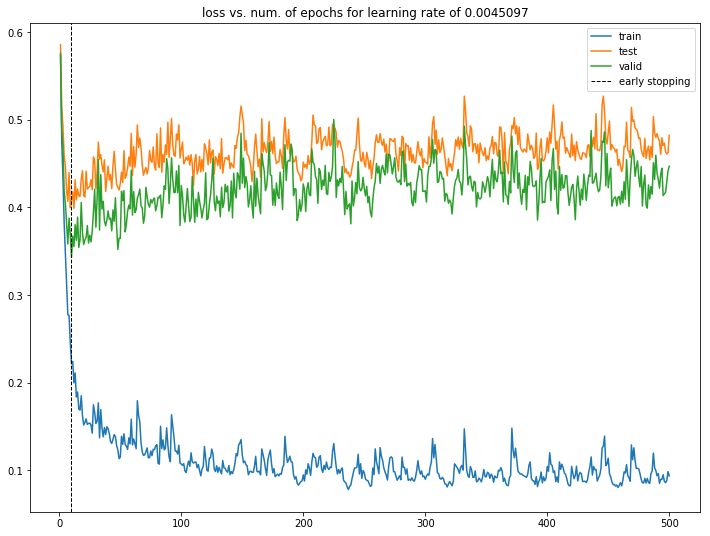

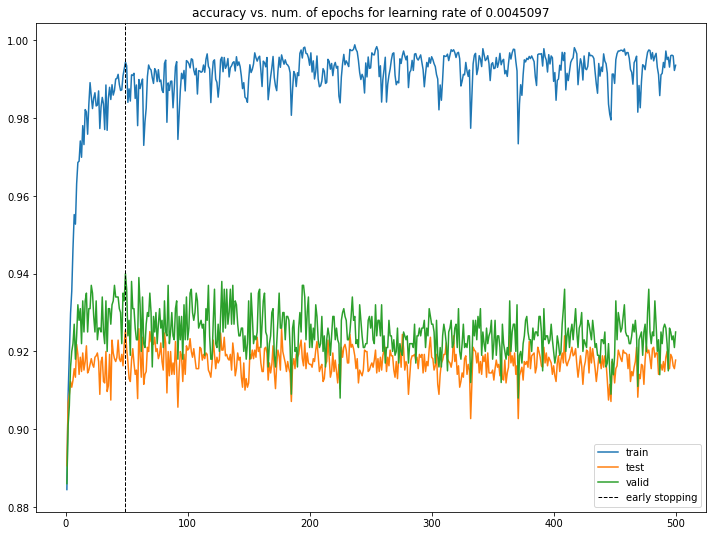

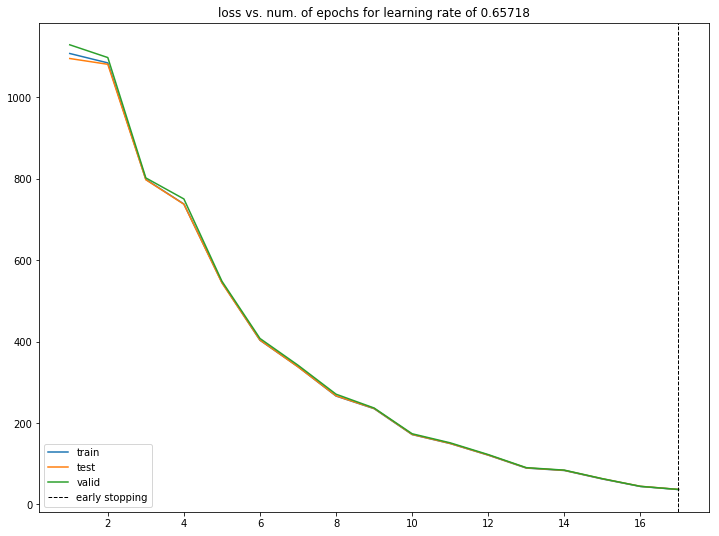

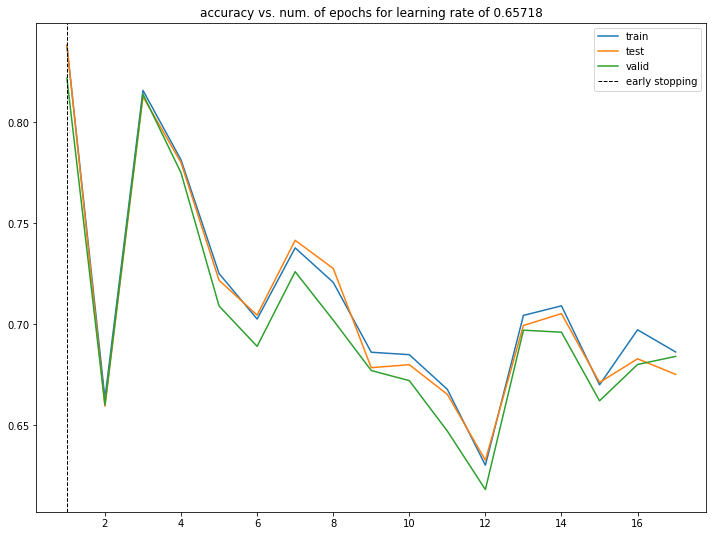

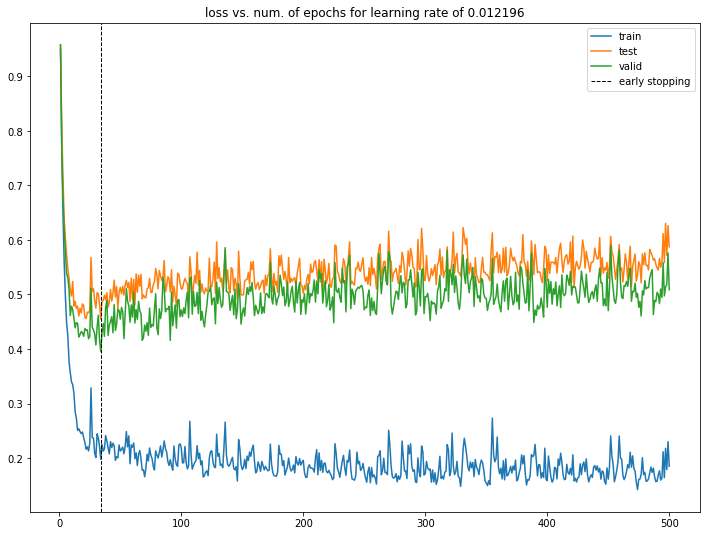

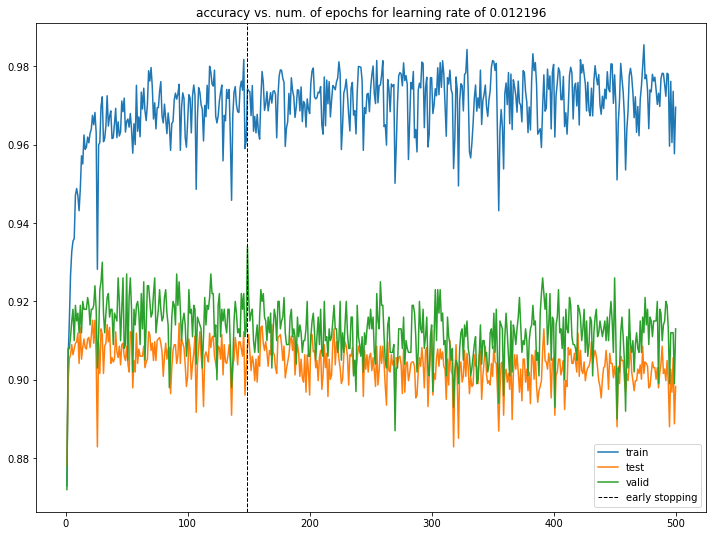

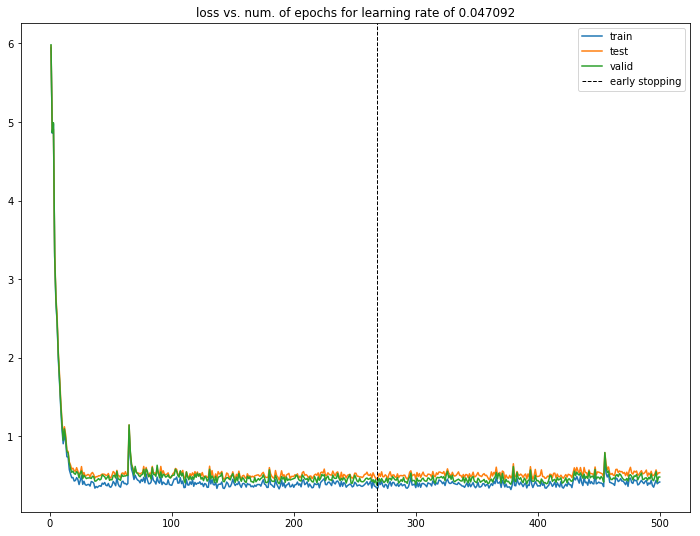

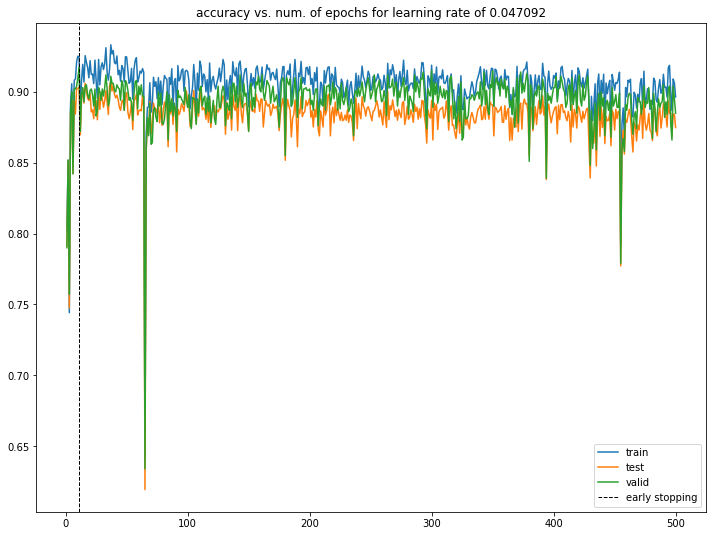

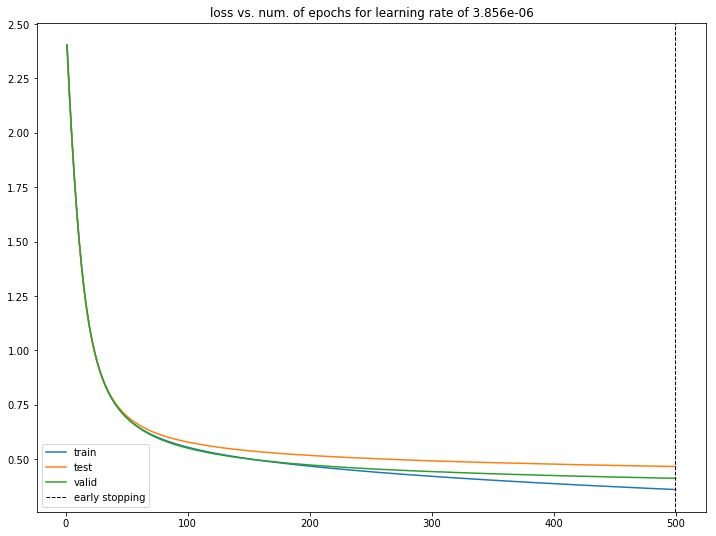

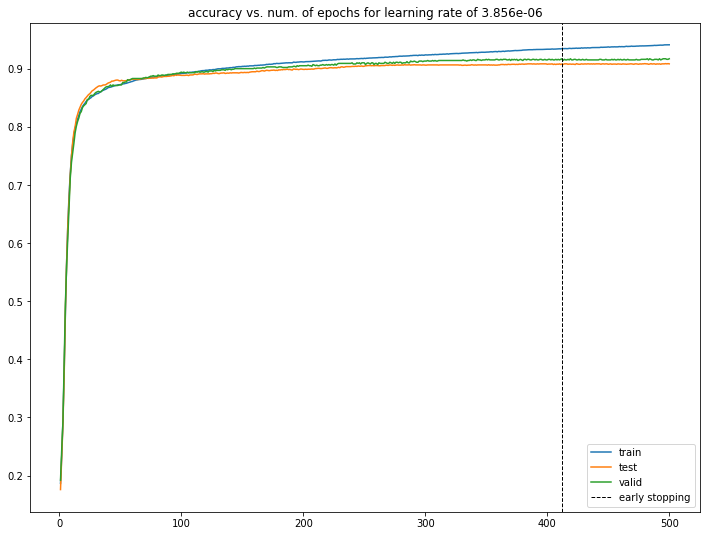

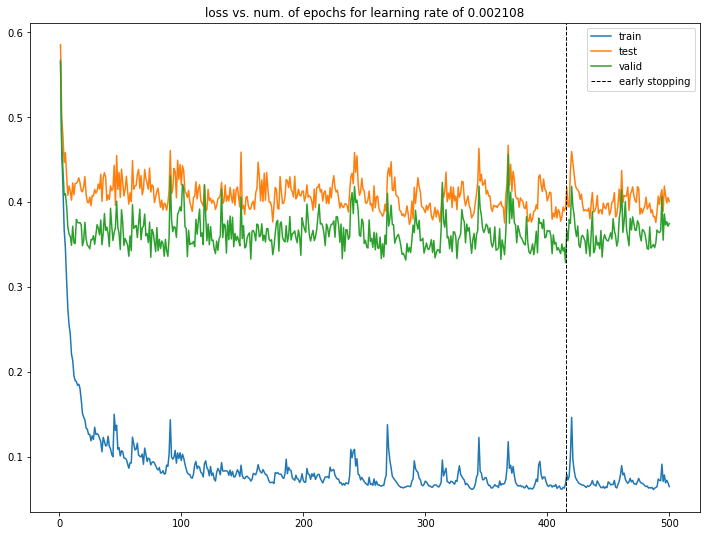

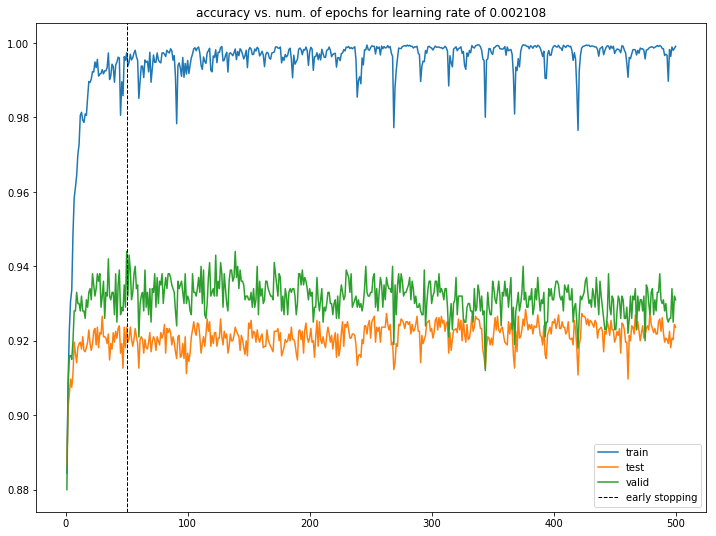

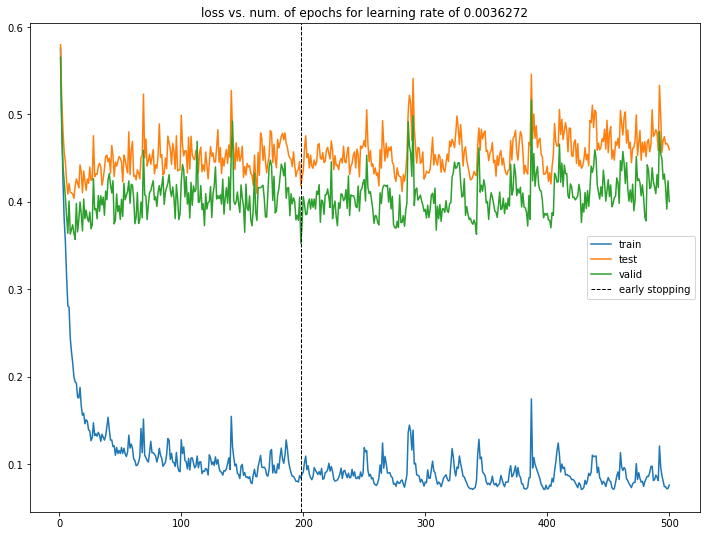

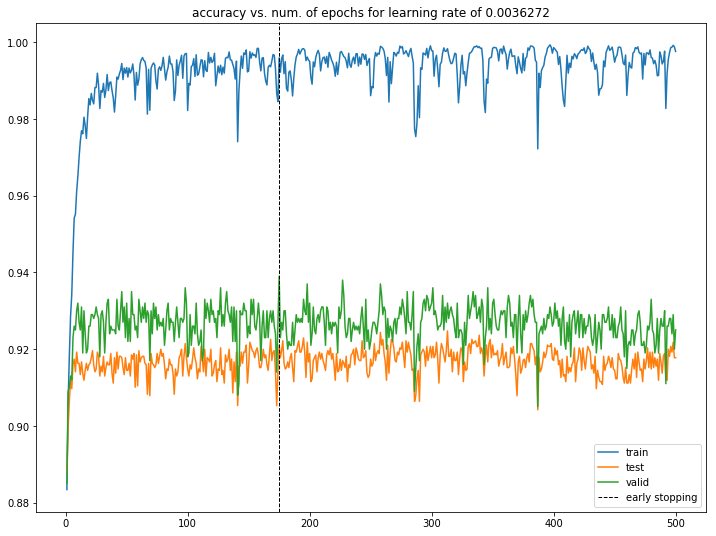

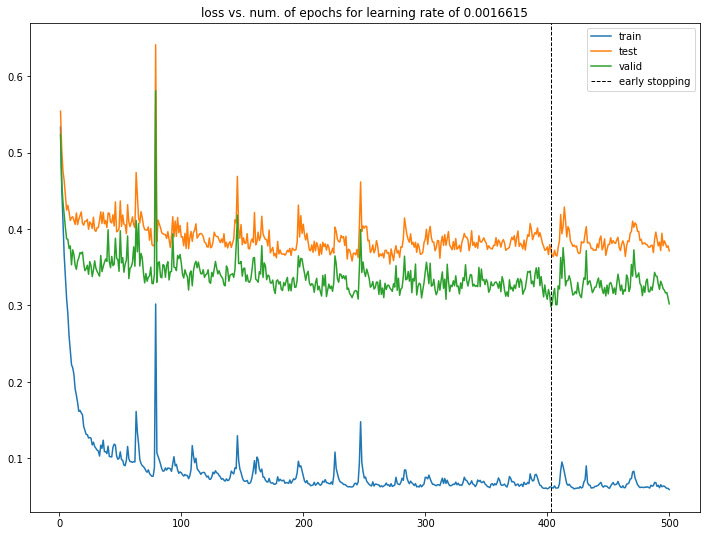

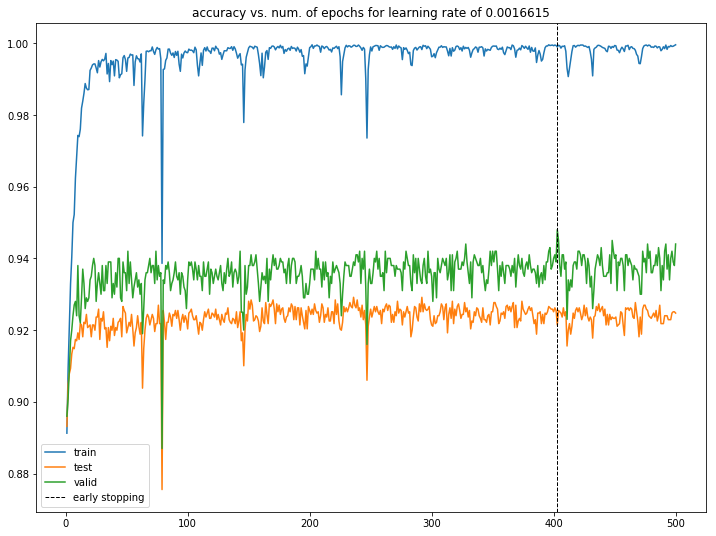

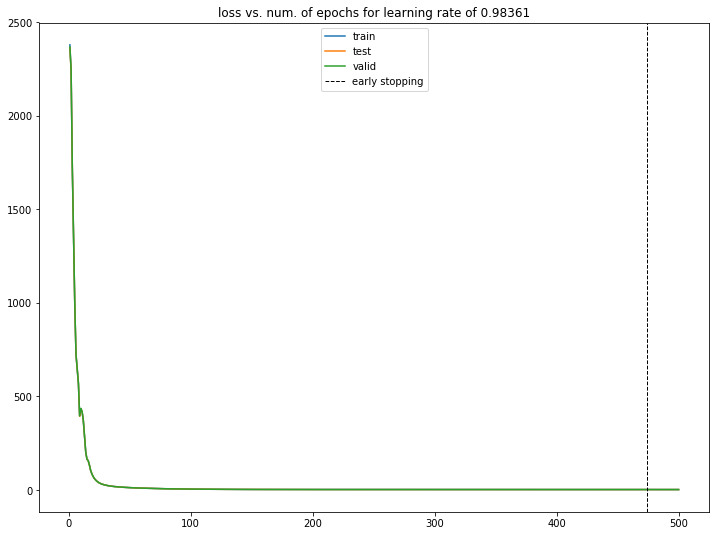

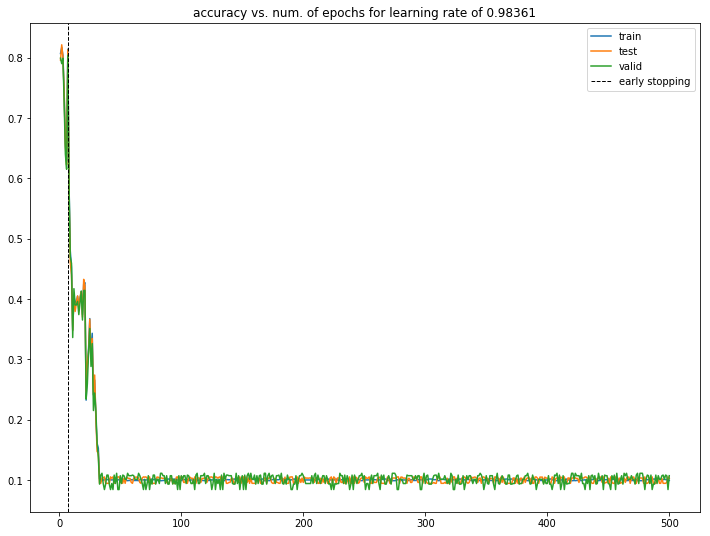

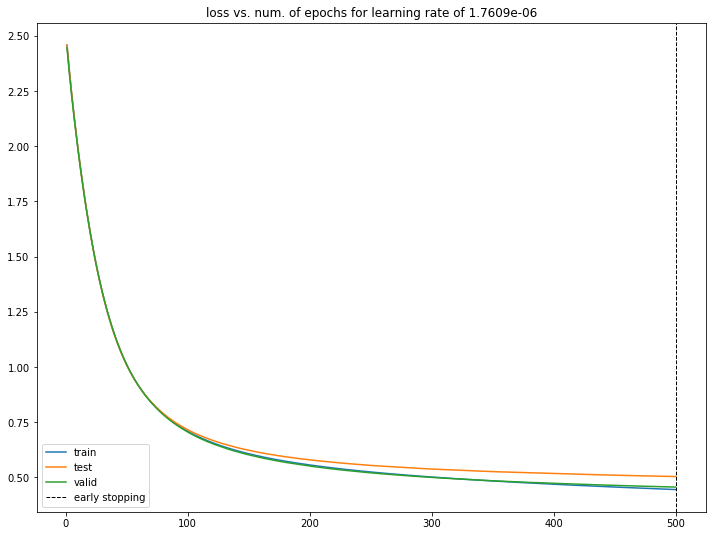

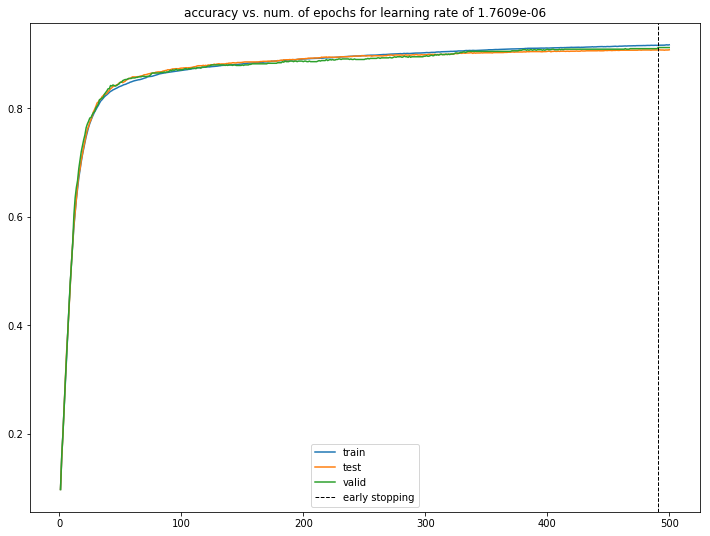

In [15]:
with tf.Session() as sess:
    for learning_rate in learning_rates:
        sess.run(init)
        valid_metrics = {'loss': [], 'accuracy': []}
        train_metrics = {'loss': [], 'accuracy': []}
        test_metrics = {'loss': [], 'accuracy': []}
        metrics = {'train': train_metrics, 'valid': valid_metrics, 'test': test_metrics}

        best_epoch = {'loss': 0, 'accuracy': 0}
        best_loss = float('inf')
        best_accuracy = 0
        epochs_since_best = 0
            
        print("Learning Rate: {} \n".format(learning_rate))
        for epoch in range(1,n_epochs+1):
            batches = grab_batches(trainData, trainTarget, batch_size)
            for X_batch, y_batch in batches:
                sess.run(training_step, feed_dict={X: X_batch, Y: y_batch, lr: learning_rate})

            train_loss, train_accuracy = sess.run([loss, accuracy], {X: trainData.reshape(-1,n_dim), Y: trainTarget})
            valid_loss, valid_accuracy = sess.run([loss, accuracy], {X: validData.reshape(-1,n_dim), Y: validTarget})
            test_loss, test_accuracy = sess.run([loss, accuracy], {X: testData.reshape(-1,n_dim), Y: testTarget})
            
            
            
            if valid_loss < best_loss:
                best_epoch['loss'] = epoch
                best_loss = valid_loss
            
            if valid_accuracy > best_accuracy:
                best_epoch['accuracy'] = epoch
                best_accuracy = valid_accuracy
                epochs_since_best = 0
            else:
                epochs_since_best += 1
            
            if epoch%10 == 0:
                print("Epoch: {}, Train Loss: {:.4}, Train Accuracy: {:.4}".format(epoch, train_loss, train_accuracy))
                print("Best Epoch: {}, Best Valid Loss: {:.4}, Best Valid Accuracy: {:.4} \n".format(best_epoch, best_loss, best_accuracy))
                
            metrics['train']['loss'].append(train_loss)
            metrics['train']['accuracy'].append(train_accuracy)
            metrics['valid']['loss'].append(valid_loss)
            metrics['valid']['accuracy'].append(valid_accuracy)
            metrics['test']['loss'].append(test_loss)
            metrics['test']['accuracy'].append(test_accuracy)
            
            if epoch < 20 and epochs_since_best > 15:
                print("Learning rate too high")
                break
        plot_metrics(learning_rate)
